# Lasso Regression (L1 Regularization)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [7]:
X,y = make_regression(n_features=1, n_targets=1, n_samples=100, noise=10, random_state=13, n_informative=1)

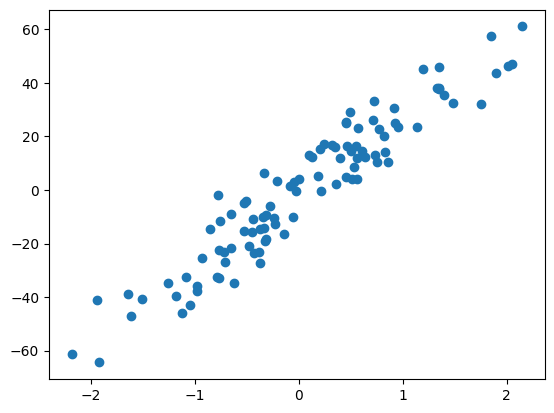

In [8]:
plt.scatter(X,y)
plt.show()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)
print(r2_score(y_test,yhat))

[28.14257533]
-1.0443498830670506
0.9178849619383831


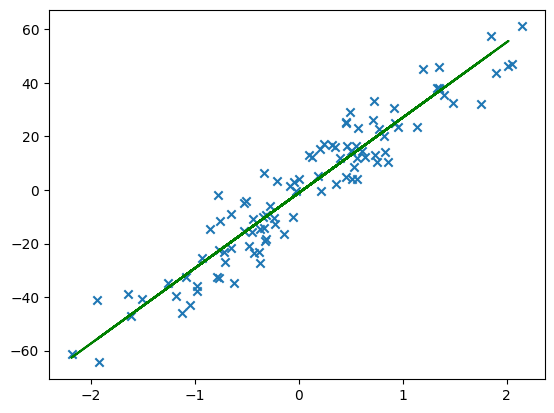

In [19]:
plt.scatter(X,y, marker='x')
plt.plot(X_train,lr.predict(X_train),color='green')
plt.show()

D:\Applications\Python\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+03, tolerance: 5.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desc

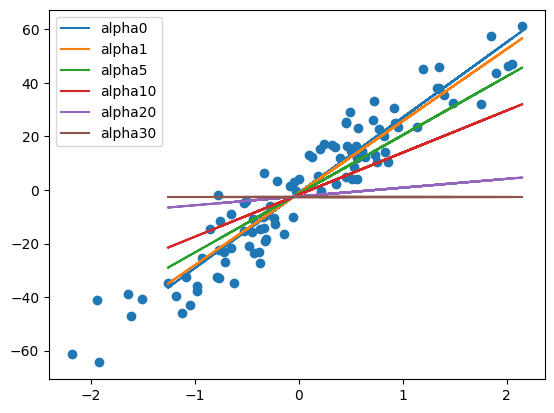

In [25]:
alphas = [0, 1, 5, 10, 20,30]   # aplpha = lambda

plt.scatter(X,y)
for i in alphas:
    ls = Lasso(alpha=i)
    ls.fit(X_train,y_train)
    yhat = ls.predict(X_test)
    plt.plot(X_test,yhat, label=f"alpha{i}")
plt.legend()
plt.show()

## Effect in Coefficient by the change the value of lambda (alpha)

In [28]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['Target']= data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [30]:

X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [36]:
coefs = []
r2_scores = []

for i in [0,0.1, 0.5, 1, 5]:
    ls = Lasso(alpha=i)
    ls.fit(X_train,y_train)
    ypred = ls.predict(X_test)
    coefs.append(ls.coef_)
    r2_scores.append(r2_score(y_test,ypred))

print("coefs : ",coefs)
print("r2_scores : ",r2_scores)

coefs :  [array([  32.50000079, -274.20835686,  501.52744088,  368.79319609,
       -822.31117549,  504.23864635,  101.57695624,  158.16545267,
        744.9154043 ,   78.40553653]), array([   0.        , -192.88934198,  497.30742663,  333.78528353,
        -60.33398962,   -0.        , -210.30806283,    0.        ,
        464.86793997,   56.38981746]), array([  0.        ,  -0.        , 461.82749573, 192.03262601,
        -0.        ,  -0.        , -50.70420836,   0.        ,
       395.62939819,   0.        ]), array([  0.        ,  -0.        , 364.28752095,  58.23962322,
         0.        ,   0.        ,  -0.        ,   0.        ,
       295.52113478,   0.        ]), array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])]
r2_scores :  [0.4522338797332591, 0.462793394646719, 0.44418279511231007, 0.3646884923786178, -0.009371819171789753]


D:\Applications\Python\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Applications\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.113e+05, tolerance: 2.165e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desc

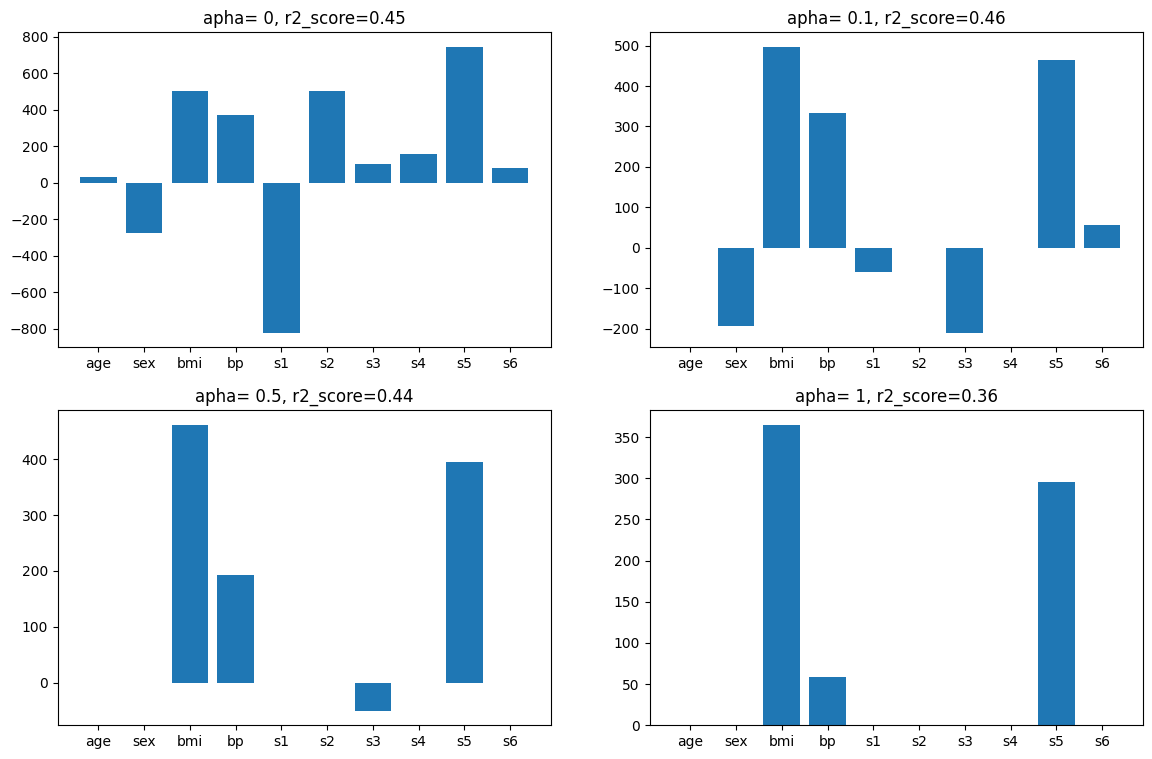

In [37]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title(f"apha= 0, r2_score={round(r2_scores[0],2)}")

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title(f"apha= 0.1, r2_score={round(r2_scores[1],2)}")

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title(f"apha= 0.5, r2_score={round(r2_scores[2],2)}")

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title(f"apha= 1, r2_score={round(r2_scores[3],2)}")
plt.show()

## on increasing the value it shows the columns that are important to predictiong the target